In [119]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [163]:
from fannypack import utils
import numpy as np
import matplotlib.pyplot as plt
import skimage.transform
from lib import omnipush_datasets

In [149]:
f = utils.TrajectoriesFile('/juno/u/brentyi/omnipush_data/ellip3_testset.hdf5')

In [150]:
f.__enter__()

In [151]:
len(f)

40

In [152]:
traj0 = f[0]

In [153]:
traj0.keys()

dict_keys(['cam_2_world', 'contact', 'contact_point', 'coord', 'force', 'friction', 'image', 'material', 'normal', 'object', 'pix_contact_point', 'pix_pos', 'pix_tip', 'pos', 'tip', 'world_2_cam'])

In [184]:
print(f.get_all('pos'))

[array([[ 4.44100015e-02,  1.26999998e-02, -8.38230422e-04,
        -3.18518169e-02],
       [ 4.44013402e-02,  1.26999998e-02, -8.37140600e-04,
        -3.19119133e-02],
       [ 4.44099121e-02,  1.26999998e-02, -8.40090099e-04,
        -3.18323188e-02],
       [ 4.61355187e-02,  1.26999998e-02, -1.63737021e-03,
        -4.47944887e-02],
       [ 4.80362624e-02,  1.26999998e-02, -2.63851462e-03,
        -7.15416372e-02],
       [ 5.00285476e-02,  1.26999998e-02, -3.64525965e-03,
        -9.15427133e-02],
       [ 5.19389361e-02,  1.26999998e-02, -4.56103822e-03,
        -9.14973617e-02],
       [ 5.38530797e-02,  1.26999998e-02, -5.41796396e-03,
        -6.29488677e-02],
       [ 5.55505864e-02,  1.26999998e-02, -6.14231080e-03,
        -6.94356300e-03],
       [ 5.68864569e-02,  1.26999998e-02, -6.68998156e-03,
         6.34914115e-02],
       [ 5.79817407e-02,  1.26999998e-02, -7.23769981e-03,
         1.34914950e-01],
       [ 5.87218143e-02,  1.26999998e-02, -7.55346753e-03,
     

In [161]:
print(f[4]['image'])

[[[[0.58463293 0.57140446 0.5724766 ]
   [0.58569634 0.57282436 0.57421446]
   [0.58870524 0.57602096 0.57659745]
   ...
   [0.6191155  0.60556185 0.6056458 ]
   [0.6169517  0.6037999  0.60417277]
   [0.6156618  0.60174125 0.6028126 ]]

  [[0.61607677 0.5975877  0.59583104]
   [0.61909    0.6009053  0.59839505]
   [0.6223935  0.6043202  0.60136   ]
   ...
   [0.65332574 0.63483185 0.63192713]
   [0.65190214 0.6332892  0.6304822 ]
   [0.6498878  0.6314702  0.62858796]]

  [[0.6252501  0.60930353 0.6049321 ]
   [0.630307   0.6134728  0.6086306 ]
   [0.63298583 0.6166198  0.6119046 ]
   ...
   [0.6635043  0.64728415 0.6423005 ]
   [0.66313833 0.64567965 0.6403861 ]
   [0.6590372  0.6425244  0.6383431 ]]

  ...

  [[0.3024117  0.29028228 0.28454405]
   [0.304027   0.2906257  0.28526145]
   [0.30400205 0.29116777 0.28479418]
   ...
   [0.7578232  0.74135923 0.7387085 ]
   [0.75399876 0.7369765  0.73483235]
   [0.75108075 0.7323947  0.73118323]]

  [[0.30299872 0.29020217 0.28585455]
   [0.3

In [128]:
set(list(np.array(object_types).squeeze()))

{b'ellip2'}

/juno/u/brentyi/miniconda/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


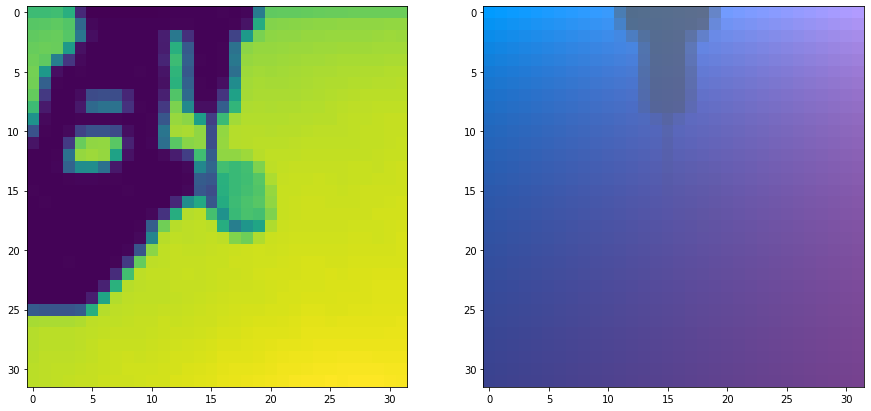

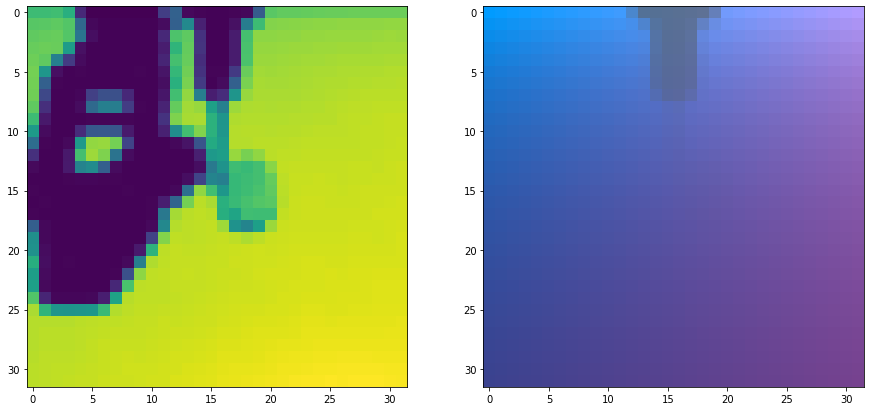

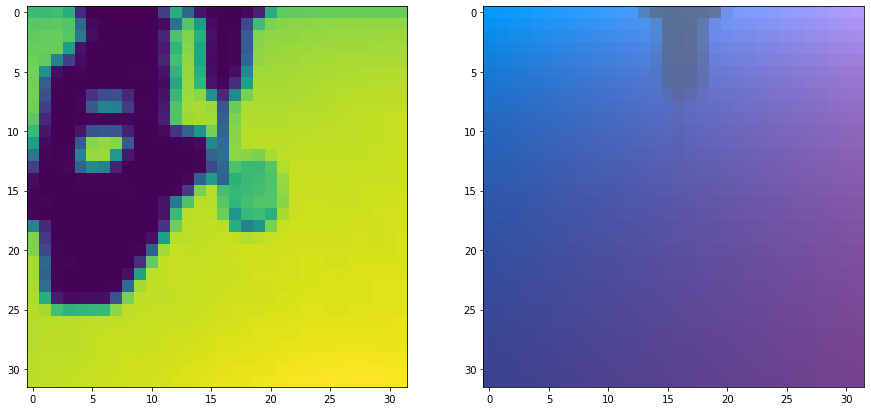

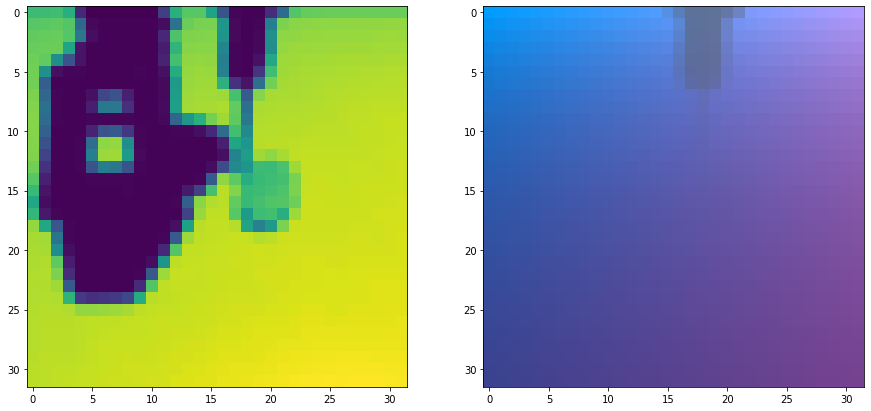

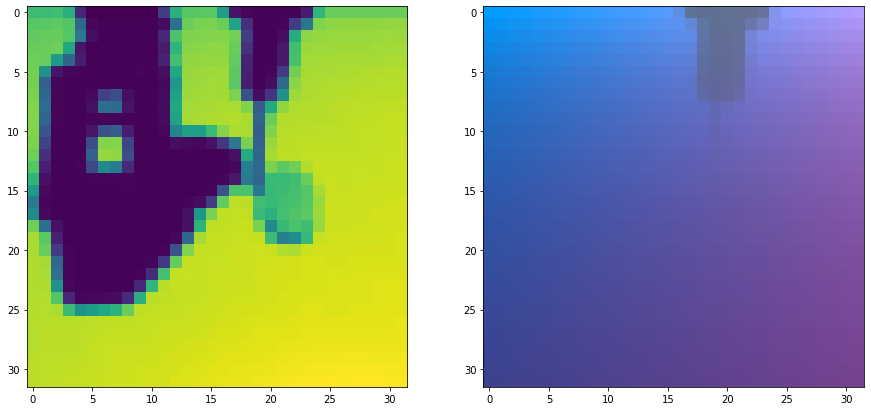

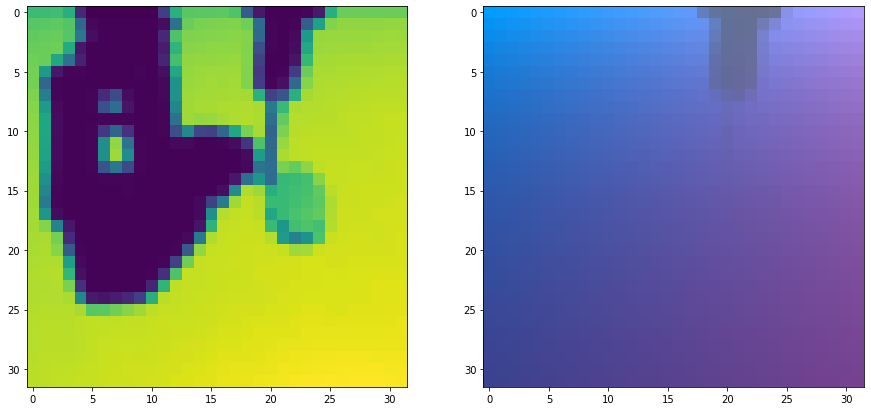

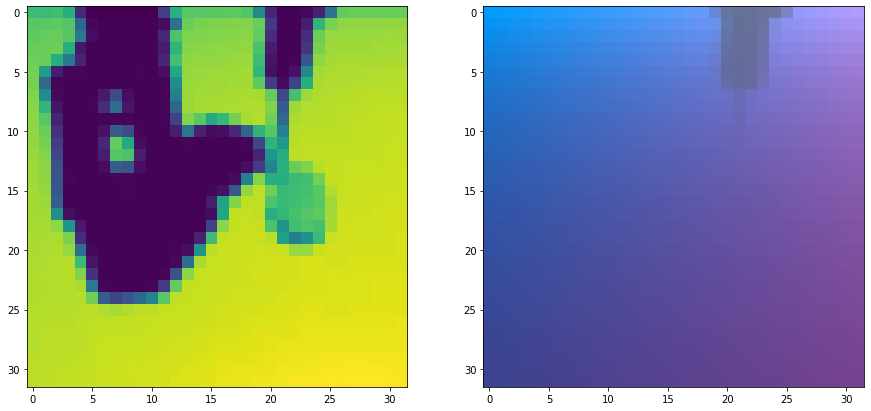

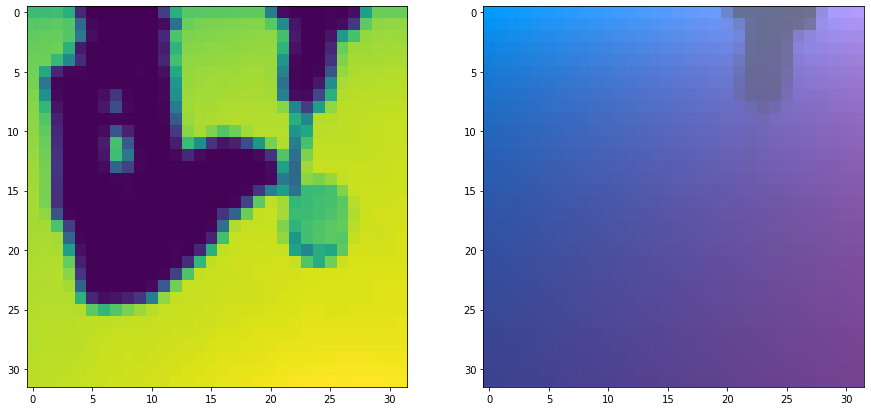

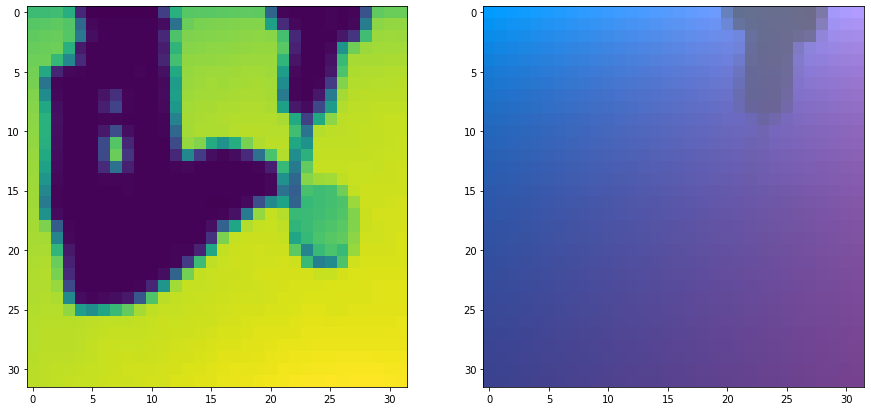

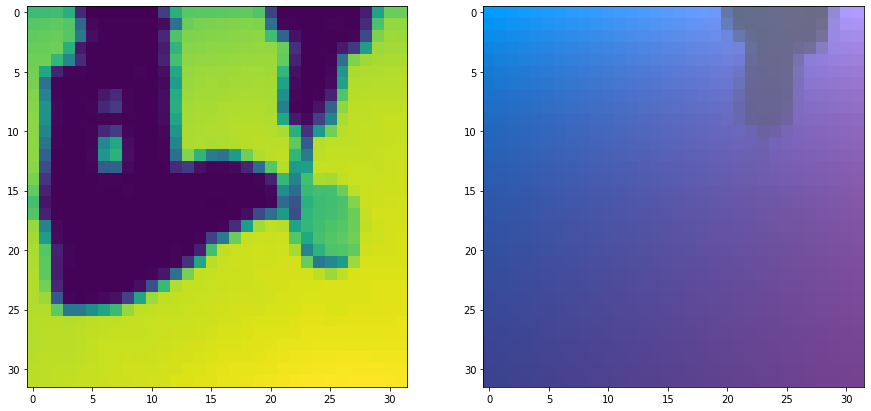

In [175]:
for t in range(0, len(traj0['image']), 10):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,20))
    ax1.imshow(np.mean(traj0['image'][t], axis=-1))
    depth = traj0['coord'][t]
    depth -= np.min(depth)
    depth /= np.max(depth)
    ax2.imshow(depth)
    fig.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
/juno/u/brentyi/miniconda/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  """
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clippi

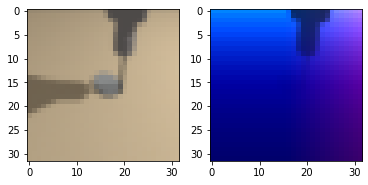

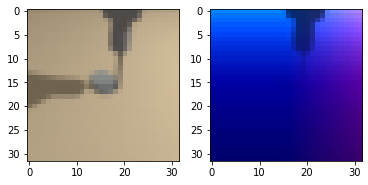

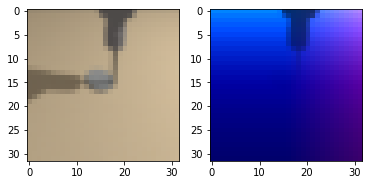

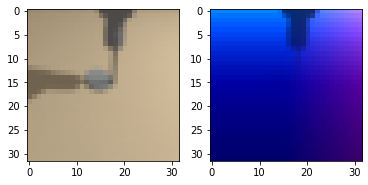

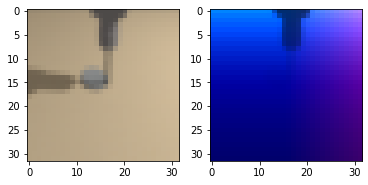

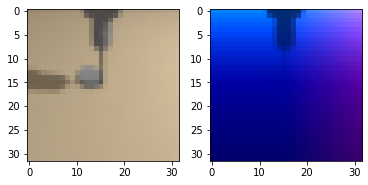

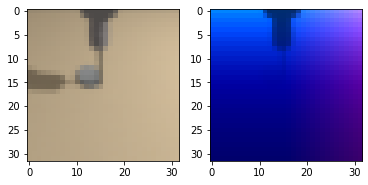

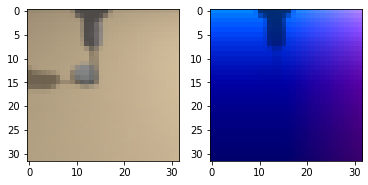

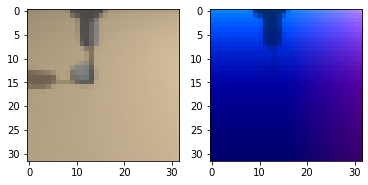

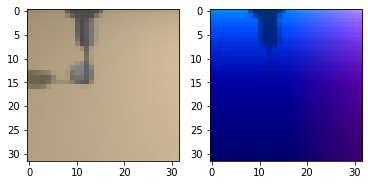

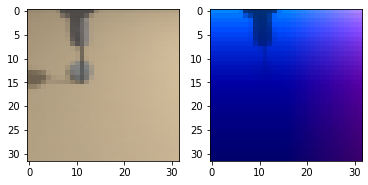

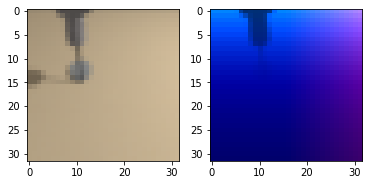

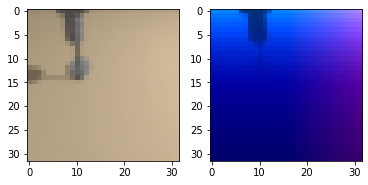

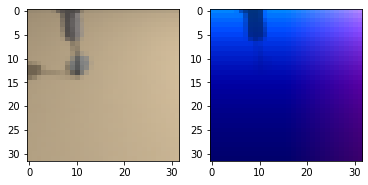

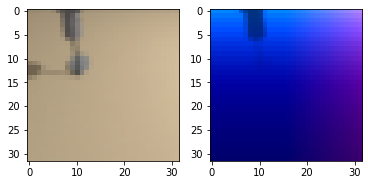

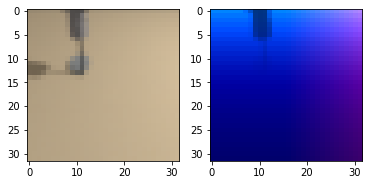

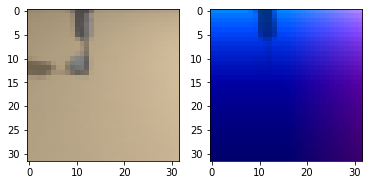

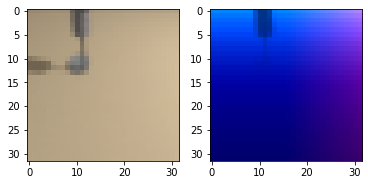

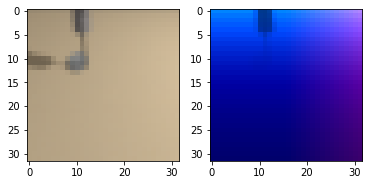

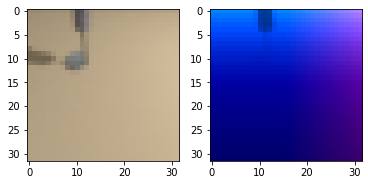

In [118]:
for t in range(0, len(traj0['image']), 5):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    ax1.imshow(skimage.transform.resize(traj0['image'][t], (32, 32, 3)))
    ax2.imshow(skimage.transform.resize(traj0['coord'][t], (32, 32, 3)))
    fig.show()

In [181]:
omnipush_datasets.load_trajectories(
    "/juno/u/brentyi/omnipush_data/ellip1_trainset.hdf5",
    "/juno/u/brentyi/omnipush_data/ellip2_trainset.hdf5",
    "/juno/u/brentyi/omnipush_data/ellip3_trainset.hdf5",
)
5

gripper_pos -= np.array([[-2.293727e-07,  0.000000e+00, -6.725099e-08]], dtype=float32)
gripper_pos /= np.array([[1.0000037, 0.       , 0.9999959]], dtype=float32)
gripper_sensors -= np.array([[ 5.78418322e-11, -7.25194442e-12, -8.64490150e-13,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        -9.04285083e-10]])
gripper_sensors /= np.array([[1.        , 1.        , 0.99999923, 0.        , 0.        ,
        0.        , 1.        ]])
states -= np.array([[5.26000490e-08, 2.32314786e-08]])
states /= np.array([[1.00000002, 1.00000001]])
controls -= np.array([[ 4.10917226e-13,  6.09901415e-12,  5.27038721e-11,
         2.52943871e-11, -6.09901415e-12,  4.43756913e-11,
        -9.04285083e-10]])
controls /= np.array([[0.99999974, 1.00000004, 0.99999993, 1.00000006, 1.00000004,
        0.99999997, 1.        ]])


5